## Linear Regression

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### Load Diabetes dataset
In this dataset ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients,

#### Target (labels)
Labels: A quantitative measure of disease progression one year after baseline.

Observe the dataset below for more information

In [3]:
from sklearn.datasets import load_diabetes

In [4]:
diabetes_all_data = load_diabetes()

In [5]:
labels = diabetes_all_data.target

In [6]:
# feature names
feature_names = diabetes_all_data.feature_names
print('feature names', feature_names)

# features
features = diabetes_all_data.data
df = pd.DataFrame(features, columns = feature_names)
df

feature names ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.002592  0.019908 -0.017646  
1   -0.039493 -0.068330 -0.092204  
2   -0.002592  0.002864 -0.025930  
3    0.034309  0.022692 -0.009362  
4   -0.002592 -0.031991 -0.046641  
..        ...       ...       ...  
437 -0.002592  0.031193  0.007207  
438  0.034309 -0.018118  0.044485  
439 -0.011080 -0.046879  0.015491  
440  0.026560  0.044528 -0.025930  
441 -0.039493 -0.004220  0.003064  

[442 rows x 10 columns]

### Dataset Exploration
#### Select the most useful feature 
Before moving on to linear regression we'll extract a subset of features. In fact, for simplicity, we'll select only one feature, and we'd want this feature to be most informative of labels. But which feature (age, sex, bmi, etc) would that be (Feature Engineering)? One way is to find the feature which is highly correlated with labels. Let's plot feature vs labels.

`Let's plot each feature against label to observe trends. we'll use the one feature for simplicity which has high predictive power- high correlation with target`.

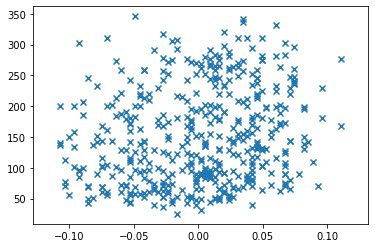

In [7]:
plt.scatter(df["age"], labels, marker='x')

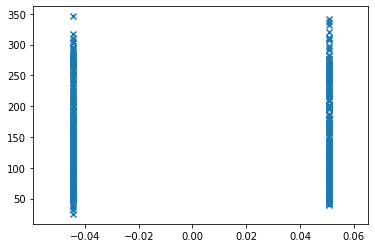

In [8]:
plt.scatter(df["sex"], labels, marker='x')

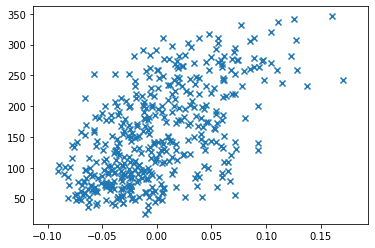

In [9]:
plt.scatter(df["bmi"], labels, marker='x')



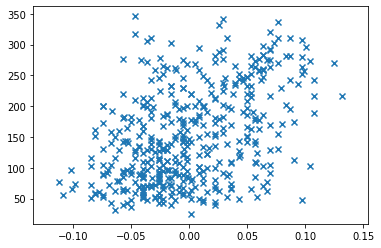

In [10]:
plt.scatter(df["bp"], labels, marker='x')

In [11]:
df['labels'] = labels

### Alternatively, find correlation matrix to find the most useful feature.
It makes intuitive sense to pick the feature which has high correlation with labels. Contrast it with a feature which is independent of labels (corr = 0)- e.g. the feature of your hair color is very non-informative of whether it'll rain tomorrow (corr = 0) whereas presence of clouds in sky has high correlation with rain. Alternatively, we could have used 'mutual information' as measure instead of correlation. See these [notes](http://cs229.stanford.edu/notes/cs229-notes5.pdf) for a mathematical treatment.

In [12]:
df.corr()

age       sex       bmi        bp        s1        s2        s3  \
age     1.000000  0.173737  0.185085  0.335427  0.260061  0.219243 -0.075181   
sex     0.173737  1.000000  0.088161  0.241013  0.035277  0.142637 -0.379090   
bmi     0.185085  0.088161  1.000000  0.395415  0.249777  0.261170 -0.366811   
bp      0.335427  0.241013  0.395415  1.000000  0.242470  0.185558 -0.178761   
s1      0.260061  0.035277  0.249777  0.242470  1.000000  0.896663  0.051519   
s2      0.219243  0.142637  0.261170  0.185558  0.896663  1.000000 -0.196455   
s3     -0.075181 -0.379090 -0.366811 -0.178761  0.051519 -0.196455  1.000000   
s4      0.203841  0.332115  0.413807  0.257653  0.542207  0.659817 -0.738493   
s5      0.270777  0.149918  0.446159  0.393478  0.515501  0.318353 -0.398577   
s6      0.301731  0.208133  0.388680  0.390429  0.325717  0.290600 -0.273697   
labels  0.187889  0.043062  0.586450  0.441484  0.212022  0.174054 -0.394789   

              s4        s5        s6    labels  
age     0.203841  0.270777  0.301731  0.187889  
sex     0.332115  0.149918  0.208133  0.043062  
bmi     0.413807  0.446159  0.388680  0.586450  
bp      0.257653  0.393478  0.390429  0.441484  
s1      0.542207  0.515501  0.325717  0.212022  
s2      0.659817  0.318353  0.290600  0.174054  
s3     -0.738493 -0.398577 -0.273697 -0.394789  
s4      1.000000  0.617857  0.417212  0.430453  
s5      0.617857  1.000000  0.464670  0.565883  
s6      0.417212  0.464670  1.000000  0.382483  
labels  0.430453  0.565883  0.382483  1.000000

#### It seems that labels have a highest correlation with 'bmi' (observe the last column or row). 
Let's just use 'bmi' as a feature.

`(Can you see why diagonal in the matrix above is all 1's?)`

In [13]:
df = df.iloc[:,:-1]  # remove the labels cols again. 

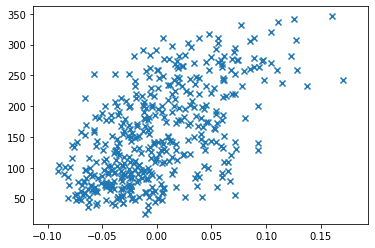

In [14]:
plt.scatter(df["bmi"], labels, marker='x')

## Hypothesis
Thus, we may hypothesize that we can form a fairly good prediction of the labels using a linear model: that is, we hypothesize that:

$$ Disease Progression = \theta_1 \times bmi + \theta_2 $$

where θ1 is the slope of the line and θ2 is the intercept term (together called the parameters of the model).

Before finding these parameters (thetas), let's first normalize and split our data.

### Normalize Features and Labels

In [98]:
df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

In [99]:
bmi = df['bmi']

In [100]:
_bmi_nor = (bmi - min(bmi)) / (max(bmi) - min(bmi)) # normmalization is very useful usually
_labels_nor = (labels - min(labels)) / (max(labels) - min(labels)) # not necessary usually


### Train/Test Split
We'll always split out dataset into two parts: Train set, Test set. Where Test set contains 20 to 30% of your dataset- a good rule of thumb. The point is to do all the learning on training set, and only touch the test data when you finally want to evalute your learned model- using unseen test data. 

Why not just use Train set for evaluation? A model giving very good evaluation on 'train set' might be a very poor model as it might be overfitting (explained later) and have very poor generalization; thereby giving poor accuracy on unseen data.

In [96]:
x_train, x_test, y_train, y_test = train_test_split(_bmi_nor, _labels_nor,\
                                                    test_size=.3, random_state=32)

In [97]:
y_train.shape

(309,)

### Exercise
Verify lengths of x_train, x_test, y_train, y_test. Size of 'x_train' should be ~70% of 'df' (original dataset).

### Finding Parameters (thetas in our hypothesis)
#### Let's try to guess what the slope and and y-intercept are:

####  Normalized labels and features
Our guess for normalized features is 1 for $ \theta_1 $ (slope) and 0 for $\theta_2$ (y-intercept).

(-0.05985663082437276, 1.0598566308243726) (-0.025924263992902985, 1.0633074415629964)


Text(0, 0.5, 'Disease Prog')

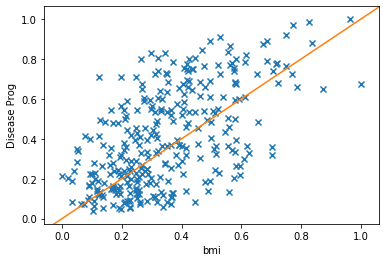

In [101]:
theta = np.array([1, 0]) # Our guess for params. Guess from hit and trial.
plt.scatter(x_train, y_train, marker='x')
xlim, ylim =(plt.gca().get_xlim(), plt.gca().get_ylim())
print(xlim, ylim)
plt.plot(xlim, [theta[0]*xlim[0]+theta[1], theta[0]*xlim[1]+theta[1]], 'C1')
plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel("bmi")
plt.ylabel("Disease Prog")

### A Disciplined Way to Find Parameters
We guessed the parameters for this simple 2d case where features include only 'bmi'. The question, of course, is how we find “good” values for θ1 and θ2 that fit this data well, i.e., so that the line fits the data as “closely” as possible. The method we will describe for doing this (which is called gradient descent) is probably not the simplest algorithm for finding this fit. In fact, as we will see, there is a very simple closed-form expression that will immediately give us the same solution for the framework we consider here. But gradient descent is an extremely powerful and general algorithm (and is actually quite simple compared to some alternative approaches), and it is no exaggeration to say that gradient descent underlies virtually all modern machine learning. So, with these caveats in place, let’s dive in to understanding how we find “good” parameters θ1 and θ2 in some disciplined manner.

### Objective Function
In order to find good values for the parameters, we need to formally define what “good” means in this setting. This will actually be one of the key questions for machine learning algorithms in general, and difference notions of goodness lead to different algorithms. Fortunately, there are some very well-studied definitions in this context, and so we have some “standard” options that we can try. The notion that we will consider here captures the idea of the “squared error” between the prediction and the actual values. i.e. we  want to minimize $$ \frac{1}{\#Patients}  \sum_{i \in Patients} (\theta_1 \times bmi + \theta_2 - DiseaseProgression) ^ 2 = E(\theta)$$

which we abbreviate as $E(\theta)$ to emphasize the fact that we are going to be minimizing this error by tuning our θ variables. 



How do we go about finding the values of θ1 and θ2 that minimize E(θ)?
We can use [gradient descent algorithm](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwj_7KT8tv7qAhUNfBoKHT94C7sQFjAKegQIBBAB&url=https%3A%2F%2Fen.wikipedia.org%2Fwiki%2FGradient_descent&usg=AOvVaw3SUzjDhB_eFrz6m_B0q6iB). Specifically, the gradient descent algorithm takes a small step in the direction of the negative partial derivative for each coordinate.'


For a more in depth the
oretical treatment, you may find [these notes](http://cs229.stanford.edu/notes/cs229-notes1.pdf) helpful. 



### Analytic Solution
Gradient descent is appealing in its generality but certainly also has some annoyances (picking step sizes, number of iterations, ensuring proper data normalization, etc). These issues will be unavoidable for many of the problems we encounter, but it turns out that for least squares in particular, a closed form alalytic solution also exits. We'll state it (in matrix form) without deriving. Derivations are available in the notes shared above. 
$$ (X^T X) \Theta = X^T y $$ 
where $\Theta$ is the set of parameters we're estimating here simply $\theta_1$ and $\theta_2$. $X$ is features matrix (ndarray), $y$ is labels. If use n features $\Theta$ would be $[\theta_1,\theta_2 ... \theta_{n+1}]$. One $\theta$ is for intecept (also called bias), also, we've appended a 1 in X such that the bias comes out as it is. More information in the notes linked above. 

#### For unnormalized data.

In [102]:
X = np.array([x_train, np.ones(len(x_train))]).T
print(X.shape)
y = y_train
computed_theta = np.linalg.solve(X.T @ X, X.T @ y) # solve the normal equation above to find params.

(309, 2)


In [103]:
computed_theta # Actual values. Close to our guess

array([0.77890484, 0.1318822 ])

Let's plot this 

(-0.05985663082437276, 1.0598566308243726) (-0.025924263992902985, 1.0633074415629964)


Text(0, 0.5, 'Disease Prog')

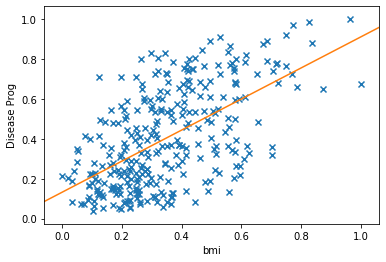

In [104]:
theta = np.array([1, 0]) # our guess for params
theta = computed_theta # overwrite guess with theta that minimizes error.
plt.scatter(x_train, y_train, marker='x')
xlim, ylim =(plt.gca().get_xlim(), plt.gca().get_ylim())
print(xlim, ylim)
plt.plot(xlim, [theta[0]*xlim[0]+theta[1], theta[0]*xlim[1]+theta[1]], 'C1')
plt.xlim(xlim)
plt.ylim(ylim)
plt.xlabel("bmi")
plt.ylabel("Disease Prog")

That's the best fit that minimizes least square error.

### Exercise (Make a Prediction)
How do we predict label of some unseen x given these parameters (from x_test)?
### Answer
Recall our hypothesis defined above (scroll above). Specifically, multiply by slope and add intercept- the result is your prediction. 


In [105]:
x_test

149    0.326446
314    0.500000
214    0.219008
95     0.123967
19     0.276860
         ...   
409    0.301653
108    0.520661
172    0.619835
386    0.190083
18     0.305785
Name: bmi, Length: 133, dtype: float64

In [106]:
# Add bias
_x_test = np.array([x_test, np.ones(len(x_test))]).T


In [107]:
# Let's predict label of example at index 0 in test set
example_0 = _x_test[0]
example_0 # observe 1 (as mentioned before, this 1 will simply our work by automatically handling intercept). 

array([0.32644628, 1.        ])

In [108]:
hypo = computed_theta * example_0
hypo # slope multiplied by example_0 and intercept as it is (multiplied by 1). Add these in next step to get the prediction. 

array([0.25427059, 0.1318822 ])

In [109]:
predicted_label = hypo.sum()
predicted_label # this is the predicted label (value).

0.3861527881352883

In [110]:
y[0] # this was the actual label. 

0.2398753894080997

## Finding Parameters Using sklearn

In [111]:
reg = LinearRegression(fit_intercept=False)
reg.fit(X, y)
# return (reg, reg.coef_)
reg.coef_

array([0.77890484, 0.1318822 ])

In [112]:
type(reg) # a _base.LinearRegression model which you also use to make predictions.

sklearn.linear_model._base.LinearRegression

### Predict Using sklearn
Sklearn provides you a neat method to predict (avoiding multplications).

In [113]:
reg.predict([example_0])

array([0.38615279])

Note that prediction is exactly the same as the one we got using numpy.

### Exercise
Predict labels of the whole test set in one line of code using sklearn.

In [115]:
# Answer
predictions = reg.predict(_x_test)
predictions.shape # shape (133,)

(133,)

### RMSE and R2

Earlier we claimed that the line we found by using numpy (solving normal equations) and using sklearn is minimzing mean square error (thereby; also minimizing root of that mean square error- rmse). Recall, [RMSE](https://en.wikipedia.org/wiki/Root-mean-square_deviation) quanitifies how close the observed data points are to the model's predicted values. But how much is this RMSE in this case? Let's find it:


In [116]:
# using sklearn 'mean_squared_error' func
mse = (mean_squared_error(y_test, predictions))
rmse = np.sqrt(mse)
rmse # lower the better

0.18776380189555186

To guage the performance of a model, another commonly used statistics in ML/Statistics is [Cofficient of determination]() a.k.a R2 which measures the proportion of the variance in the labels (dependent variable) that is predictable from the features (independent variables). See sklearn [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score) on how it mathematically implements it. See this wikipedia link for what [caveats](https://en.wikipedia.org/wiki/Coefficient_of_determination#Caveats) R2 has.

R2 is always less than 1 and higher the value the better.

Let's find R2 in our case:

In [118]:
score = reg.score(_x_test, y_test) # R2 value- ~0.33
score # higher the better

0.3316041747499109

### Overfitting and Regularization
We in general are interested in how our ML model performs on test data (unseen data) i.e. we're interested in reducing 'generalization error'. It's usually true that if the model is performing well on training data, it'll likely perfrom well on test data, but that's not true always. Specifically, if the model tries too hard to fit the parameters on training data, it can capture too much noise; thereby increasing its generatlization error. Accuracy on training data might be very good but on test data might be very poor. In this case, the model is said to `overfit`. 

We can prevent `overfitting` by `regularization`. Regularization shrinks (regularizes) the parameters towards zero. Regularization discourages learning a more complex model that's trying too hard to fit the train data by adding a penalty term in the loss function/objective function. People sometimes use absolute value of parameters as penalities (called L-1 regularization), and sometimes add squared value of parameters as penalities (called L-2 regularization). 

`Aside`: There is a thoeretical justification for each choice (L1/L2) from Bayesian perspective (if prior follows a Guassian distribution use L-2- if it follows a Laplacian distribution use L-1) which we wish we could talk more about; however, it's beyond the scope of this tutorial. You're encouraged to read these [notes](http://cs229.stanford.edu/notes/cs229-notes4.pdf) for more information. 


## Base for ML Aglorithms (Setting the Stage)
### ML Terms  to define a general ML Algorithm 
We learned the first Machine Learning algorithm in this course- Linear regression. To define machine learning in more general terms, we’re going to first introduce some terminology. The following elements form the foundation for mathematically defining machine learning algorithms. 

* Inputs (features) $ x^{(i)} \in R^n $ $ where \ x^{(i)}$ are n-dim features of ith example

> Features, are the information fed into the machine learning algorithm

* Outputs $ y^{(i)} \in Y $ 

> Outputs in a machine learning setting are quantities in some set $Y$, denoting the output space. Common output spaces will be real-valued scalars (for regression tasks), or binary or multivariate discrete quantities (for classification tasks).

* Parameters $ \theta \in R^d $ 
> Parameters of a machine learning algorithm are the numbers that define our prediction function. They are the elements that we will optimize to make the prediction as good as possible.

* Hypothesis function $ h_{\theta}: R^n \rightarrow \widehat{Y}$ here linear hypothesis

> A hypothesis funtion is a mapping from the input space Rn to the prediction space $\widehat{Y}$

* Loss function (here least square  loss)
> Finally, a loss function (a mapping from predictions and true outputs to positive real numbers, is a measure of how good a prediction is. If the prediction is “close” to the true output, we want this quantity to be small

### ML Algorithms General Form:
With this ingredients defined we can, we can write about every machine learning algorithm that exists in the following canonical form: the goal of any machine learning algorithm is to find the parameters that minimize the average of losses on the data. This problem is written formally as:

$$ minimize_{\theta} \  \frac{1}{m} \sum_{1}^{m} l(h_{\theta}(x^{(i)}, y^i) = minimize_{\theta}  \ E(\theta)$$


In the next tutorial, we'll study classification algorithms logistic regression, support vector machine etc and you'll to define them (or any  ML algorithm in general) we'll specify Hypothesis function, Loss function and the way to optimize loss function just like we did here